This iPython Notebook functions to analyze two-site pixel intensity with respect to bud emergence time in a rdi1-delta mutant. The final output are two graphical analyses: The coexistence time of two site activation and the kinetic intensity profile of each site with respect to bud emergence.

It requires two output csv files from Measure_Intensities.txt macro that runs in ImageJ/FIJI.

Site_2_intensities.csv
Site_1_intensities.csv
/Users/Kristen/Documents/Images/rdi1/05202013_Bem1rdi1del_TwoandMove/TwoTargets/processedImages/Cell_8*/Sites.pdf


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


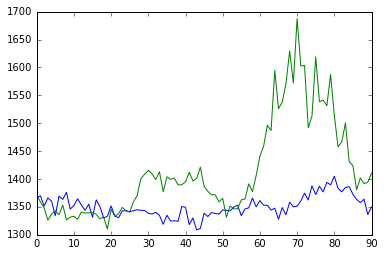

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import math


directory = 'your directory'

sites = ["Site_1_intensities.csv", "Site_2_intensities.csv"]

for root, expt_dirs, files in os.walk(directory):
    means = {}
    for curr_site in sites: 
        current_file = os.path.join(directory, curr_site)
        data = pd.read_csv(current_file)
        #max_data = data[["Max_ROI_0", "Max_ROI_1", "Max_ROI_2"]]
        
        mean_data = data[["Mean_ROI_0", "Mean_ROI_1", "Mean_ROI_2"]]
        mean_data['ave'] = mean_data.mean(axis=1)
        mean_data['sem'] = (mean_data.std(axis=1))/math.sqrt(3)
        means[curr_site] = mean_data

for key in means:
    print key
    curr_site = means[key]
    ave = np.asarray((curr_site['ave']))
    plt.plot(ave)

save_to = directory+"/Sites.pdf"
print(save_to)
plt.savefig(save_to)        

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


['Cell_3*', 'Cell_6*', 'Cell_8*', 'Cell_7*', 'Cell_5*', 'Cell_4*', 'Cell_2*', 'Cell_1']
Cell_3*
Cell_6*
Cell_8*
Cell_7*
Cell_5*
Cell_4*
Cell_2*
Cell_1


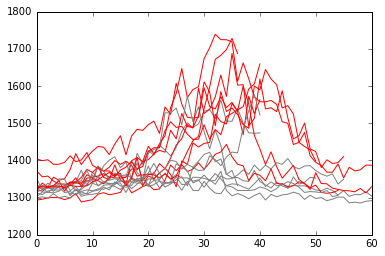

In [3]:
def extract_BE_time(be_text):

    with open(be_text, 'r') as be:
        reader = be.readlines()
        all_lines = []
        for line in reader:
            split = line.split("\t")
            all_lines.append(split)
        be = int(all_lines[1][0])
    return be

def slice_timepoints(df, timepoints, be):

    labels = [x for x in range(62)]
    intensity_be_index = 0
    start = be - 41
    if start < 0:
        start = start - start
    end = be + 20
    if end > len(timepoints):
        end = len(timepoints)

    sliced = df[start:end]

    time_sliced = timepoints[start:end]

    dex_be = time_sliced.index(be)

    if sliced.shape[0] < 61:
        i = 0
        if dex_be < 40:
            num_zeroes_to_pad = 40 - dex_be
            zeroes = np.asarray([1.0]*num_zeroes_to_pad)
            column_name = list(df.columns.values)[0]
            zeroes_df = pd.DataFrame(zeroes, columns=[column_name])
            df_to_concat = [zeroes_df, sliced]
            insert_zeroes = pd.concat(df_to_concat).reset_index().reindex(labels)

        elif dex_be == 40:
            num_zeroes_to_pad = int(61 - sliced.shape[0])
            zeroes = np.asarray([1.0]*num_zeroes_to_pad)
            column_name = list(df.columns.values)[0]
            zeroes_df = pd.DataFrame(zeroes, columns=[column_name])
            df_to_concat = [sliced, zeroes_df]
            insert_zeroes = pd.concat(df_to_concat).reset_index().reindex(labels)        
    else:
        insert_zeroes = sliced.reset_index().reindex(labels)

    return insert_zeroes

directory = 'your directory'

all_cells = {}

sites = ["Site_1_intensities.csv", "Site_2_intensities.csv"]

for dirs in os.listdir(directory):
    curr_dir = os.path.join(directory, dirs)
    if os.path.isdir(curr_dir):
        both_sites = {}
        for curr_site in sites:
            current_file = os.path.join(curr_dir, curr_site)
            data = pd.read_csv(current_file)
        
            mean_data = data[["Mean_ROI_0", "Mean_ROI_1", "Mean_ROI_2"]]
            mean_data['ave'] = mean_data.mean(axis=1)
            mean_data['sem'] = (mean_data.std(axis=1))/math.sqrt(3)
            #means[curr_site] = mean_data
            both_sites[curr_site] = mean_data
        all_cells[dirs] = both_sites

            
print all_cells.keys()            
all_aves = []            
for cell in all_cells:
    curr_data = all_cells[cell]['Site_1_intensities.csv']
    cell_path = os.path.join(directory, cell)
    bud_path = os.path.join(cell_path, "BudEmergence.txt")
    be = extract_BE_time(bud_path)
    num_timepoints = 97
    time = range(1, num_timepoints+1)
    sliced_data = slice_timepoints(curr_data, time, be)
    curr_ave = np.asarray(sliced_data['ave'])
    all_aves.append(curr_ave)
    #print curr_ave
    print cell
    
all_offsite_aves = []            
for cell in all_cells:
    curr_data = all_cells[cell]['Site_2_intensities.csv']
    cell_path = os.path.join(directory, cell)
    bud_path = os.path.join(cell_path, "BudEmergence.txt")
    be = extract_BE_time(bud_path)
    num_timepoints = 97
    time = range(1, num_timepoints+1)
    sliced_data = slice_timepoints(curr_data, time, be)
    curr_ave = np.asarray(sliced_data['ave'])
    all_offsite_aves.append(curr_ave)
    #print curr_ave
    
for onsite_ave, offsite_ave in zip(all_aves, all_offsite_aves):
    plt.plot(onsite_ave, color="red")
    plt.plot(offsite_ave, color="gray")
    

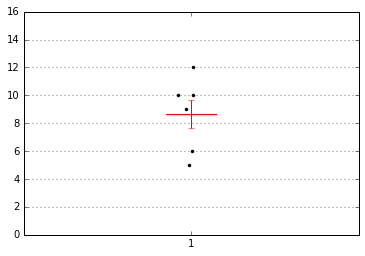

In [24]:
duration_times = np.asarray([10,10,5,12,9,6])
std = np.std(np.asarray(duration_times))
num_cells = float(len(duration_times))
sem = std/(math.sqrt(num_cells))
ave = np.mean(duration_times)


fig = plt.figure()
ax = fig.gca()
    
whiskerprops = dict(linestyle='')
medianprops = dict(linestyle='')
meanlineprops = dict(linestyle='-', color='red')

bp = plt.boxplot(duration_times, showbox=False, showcaps=False, meanprops=meanlineprops, meanline=True, showmeans=True, medianprops=medianprops, showfliers=False, whiskerprops=whiskerprops)
x = np.random.normal(1, 0.01, size=len(duration_times))
plt.plot(x, duration_times, color='k', marker='.', linestyle='')

plt.ylim(0,16)
#ax.set_xticks(np.arange(1.5,8.5,1))
#ax.set_yticks(np.arange(-1.0,1,0.25))
plt.rc('grid', linestyle=":", color='black')
ax.yaxis.grid()


plt.errorbar([1], ave, yerr=sem, fmt=None, ecolor='red')

save_to = 'your directory'
plt.savefig(save_to)

plt.show()

In [36]:
df = pd.DataFrame.from_dict(all_cells)
df.head()

,Cell_1,Cell_2*,Cell_3*,Cell_4*,Cell_5*,Cell_6*,Cell_7*,Cell_8*
Site_1_intensities.csv,Mean_ROI_0 Mean_ROI_1 Mean_ROI_2 ...,Mean_ROI_0 Mean_ROI_1 Mean_ROI_2 ...,Mean_ROI_0 Mean_ROI_1 Mean_ROI_2 ...,Mean_ROI_0 Mean_ROI_1 Mean_ROI_2 ...,Mean_ROI_0 Mean_ROI_1 Mean_ROI_2 ...,Mean_ROI_0 Mean_ROI_1 Mean_ROI_2 ...,Mean_ROI_0 Mean_ROI_1 Mean_ROI_2 ...,Mean_ROI_0 Mean_ROI_1 Mean_ROI_2 ...
Site_2_intensities.csv,Mean_ROI_0 Mean_ROI_1 Mean_ROI_2 ...,Mean_ROI_0 Mean_ROI_1 Mean_ROI_2 ...,Mean_ROI_0 Mean_ROI_1 Mean_ROI_2 ...,Mean_ROI_0 Mean_ROI_1 Mean_ROI_2 ...,Mean_ROI_0 Mean_ROI_1 Mean_ROI_2 ...,Mean_ROI_0 Mean_ROI_1 Mean_ROI_2 ...,Mean_ROI_0 Mean_ROI_1 Mean_ROI_2 ...,Mean_ROI_0 Mean_ROI_1 Mean_ROI_2 ...


['Cell_3*', 'Cell_6*', 'Cell_8*', 'Cell_7*', 'Cell_5*', 'Cell_4*', 'Cell_2*', 'Cell_1']
Cell_3*


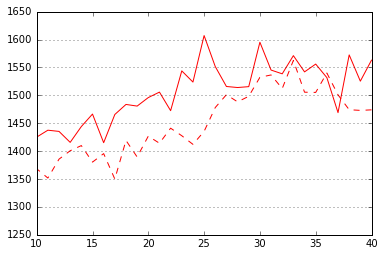

In [8]:
print all_cells.keys()            
all_onsite_aves = []
all_offsite_aves = []

directory = 'your directory'

for cell in all_cells:
    #if cell == "Cell_4*" or cell == "Cell_3*":
    if cell == "Cell_3*":
        onsite_data = all_cells[cell]['Site_1_intensities.csv']
        offsite_data = all_cells[cell]['Site_2_intensities.csv']
        cell_path = os.path.join(directory, cell)
        bud_path = os.path.join(cell_path, "BudEmergence.txt")
        be = extract_BE_time(bud_path)
        num_timepoints = 97
        time = range(1, num_timepoints+1)
        onsite_slice = slice_timepoints(onsite_data, time, be)
        offsite_slice = slice_timepoints(offsite_data, time, be)
        onsite_ave = np.asarray(onsite_slice['ave'])
        offsite_ave = np.asarray(offsite_slice['ave'])
        all_onsite_aves.append(onsite_ave)
        all_offsite_aves.append(offsite_ave)
        #print curr_ave
        print cell
        fig = plt.figure()
        ax = fig.gca()
        plt.plot(onsite_ave, color="red")
        plt.plot(offsite_ave, "r--")
        plt.xlim(10,40)
        plt.ylim(1250,1650)
        plt.rc('grid', linestyle=":", color='black')
        ax.yaxis.grid()
        save_to = directory + cell + "/BothSites_RelativeToBE_NEW.pdf"
        plt.savefig(save_to)
        plt.show()

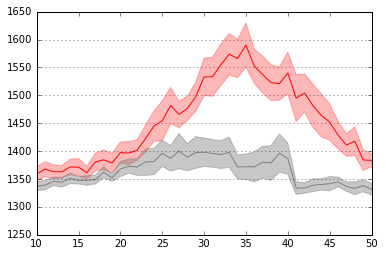

In [54]:
on_site = pd.DataFrame(all_onsite_aves).T
off_site = pd.DataFrame(all_offsite_aves).T

on_site['ave'] = on_site.mean(axis=1)
on_site['sem'] = (on_site.std(axis=1))/math.sqrt(7)

off_site['ave'] = off_site.mean(axis=1)
off_site['sem'] = (off_site.std(axis=1))/math.sqrt(7)

on_ave = np.asarray(on_site['ave'])
on_sem = np.asarray(on_site['sem'])

off_ave = np.asarray(off_site['ave'])
off_sem = np.asarray(off_site['sem'])

on_negative_error = np.asarray([a-b for a, b in zip(on_ave, on_sem)])
on_positive_error = np.asarray([a+b for a, b in zip(on_ave, on_sem)])

off_negative_error = np.asarray([a-b for a, b in zip(off_ave, off_sem)])
off_positive_error = np.asarray([a+b for a, b in zip(off_ave, off_sem)])

fig = plt.figure()
ax = fig.gca()
plt.plot(on_ave, color="red")
plt.plot(off_ave, color="gray")

xs = range(0,62)

plt.fill_between(xs, on_negative_error, on_positive_error, alpha=0.15, edgecolor='red', facecolor='red')
plt.fill_between(xs, on_negative_error, on_positive_error, alpha=0.15, edgecolor='red', facecolor='red')
plt.fill_between(xs, off_negative_error, off_positive_error, alpha=0.25, edgecolor='gray', facecolor='gray')
plt.fill_between(xs, off_negative_error, off_positive_error, alpha=0.25, edgecolor='gray', facecolor='gray')

plt.xlim(10,50)
plt.rc('grid', linestyle=":", color='black')
ax.yaxis.grid()

save_to = '/Users/Kristen/Documents/Images/rdi1/05202013_Bem1rdi1del_TwoandMove/TwoTargets/TwoTargetIntensity.pdf'
plt.savefig(save_to)